In [3]:
!python -m spacy download en_trf_bertbaseuncased_lg

     |█▋                              | 20.8MB 13kB/s eta 8:11:402ERROR: Exception:
Traceback (most recent call last):
  File "/home/amit/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/contrib/pyopenssl.py", line 304, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "/home/amit/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1822, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "/home/amit/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1622, in _raise_ssl_error
    raise WantReadError()
OpenSSL.SSL.WantReadError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/amit/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 397, in _error_catcher
    yield
  File "/home/amit/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 479, in read
    data = self._fp.read(amt)
  File "/home/amit/anaconda3/li

In [1]:
import spacy

In [2]:
nlp = spacy.load("en_trf_bertbaseuncased_lg")

In [4]:
print(doc[0].similarity(doc[7]))

0.50409985


In [6]:
doc[7],doc[0]

(Apple, Apple)

In [7]:
print(doc._.trf_last_hidden_state.shape)

(16, 768)


In [8]:
import pandas as pd

In [9]:
 pd.__version__

'0.25.3'

In [10]:
data = pd.read_csv('Text_Similarity_Dataset.csv')


In [11]:

data.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [53]:
from multiprocessing import Process

In [52]:
help(nlp(a).similarity)

Help on built-in function similarity:

similarity(...) method of spacy.tokens.doc.Doc instance
    Make a semantic similarity estimate. The default estimate is cosine
    similarity using an average of word vectors.
    
    other (object): The object to compare with. By default, accepts `Doc`,
        `Span`, `Token` and `Lexeme` objects.
    RETURNS (float): A scalar similarity score. Higher is more similar.
    
    DOCS: https://spacy.io/api/doc#similarity



In [165]:
def sim(both):
    a,b=both
    return nlp(a).similarity(nlp(b))

In [23]:
p=map(sim,(doc1,doc2))

In [27]:
a,b=[1,2,3],[4,5,6]

In [31]:
for i,j in zip(a,b):
    print(i,j)

1 4
2 5
3 6


In [39]:
Sims = []

In [62]:
%%time
for a,b in zip(data.text1,data.text2):
    Sims.append(nlp(a).similarity(nlp(b)))

KeyboardInterrupt: 

While running the above cell it was observed that only 2 cores were being used for the execution and it took a lot of time to execute

In [41]:
len(Sims)

1979

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

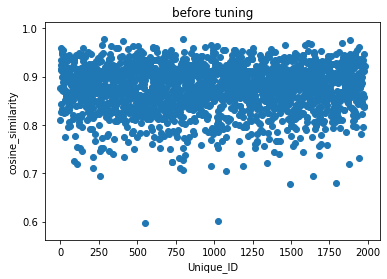

In [44]:
x = np.array(data.Unique_ID[:len(Sims)])
y = np.array(Sims)
plt.scatter(x,y)
plt.title("before tuning")
plt.xlabel("Unique_ID")
plt.ylabel("cosine_similarity")
plt.show()

In [46]:
apis = np.load('paralleldots.npy')

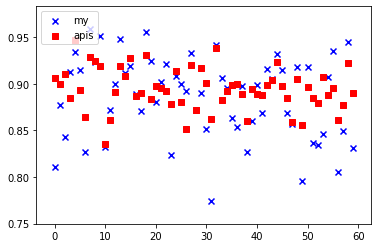

In [51]:
plt.scatter(x[:60],y[:60], c='b', marker='x', label='my')
plt.scatter(x[:60], apis[:60], c='r', marker='s', label='apis')
plt.legend(loc='upper left')
plt.show()

In [53]:
Sims1=[]

In [64]:
%%time
for a,b in zip(data.text1[:5],data.text2[:5]):
    Sims1.append(sim(a,b))

CPU times: user 39.7 s, sys: 252 ms, total: 40 s
Wall time: 20 s


In [65]:
import concurrent.futures

In [83]:
poolExe=[]

In [112]:
%%time
with concurrent.futures.ProcessPoolExecutor() as executor:
    secs = zip(data.text1[:5],data.text2[:5])
    results = executor.map(sim, secs)
    for result in results:
        print(result)

ValueError: not enough values to unpack (expected 2, got 1)

447 ms 

In [107]:
for results in results:
    print(result)

In [93]:
from multiprocessing import Pool

In [116]:
len([[1,2],[3,4],[5,6],[7,8]])

4

In [154]:
s = [[m,n] for m,n in zip(range(5),range(5))]

In [155]:
s

[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]

In [157]:
secs = [[t1,t2] for t1,t2 in zip(data.text1[:5],data.text2[:5])]

In [160]:
q = map(sim,secs)

In [162]:
for sec in secs:
    print(sim(secs))

ValueError: not enough values to unpack (expected 2, got 1)

In [177]:
%%time
r=[]
secs = [[t1,t2] for t1,t2 in zip(data.text1[:5],data.text2[:5])]
for x in secs:
    r.append(sim(x))

CPU times: user 46.9 s, sys: 415 ms, total: 47.3 s
Wall time: 24.1 s


In [171]:
r

[0.8110303421401359,
 0.877268732185598,
 0.842604867330238,
 0.9131700426720405,
 0.9338778540832334]

In [189]:
%%time
with Pool(4) as p:
    secs = [[t1,t2] for t1,t2 in zip(data.text1[:20],data.text2[:20])]
    result = p.map(sim, secs)

CPU times: user 135 ms, sys: 281 ms, total: 416 ms
Wall time: 2min 25s


2.36s

In [187]:
%%time
with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = [[t1,t2] for t1,t2 in zip(data.text1[:20],data.text2[:20])]
    results = executor.map(sim, secs)

CPU times: user 5min 7s, sys: 1min 16s, total: 6min 23s
Wall time: 1min 42s


In [186]:
%%time
with concurrent.futures.ProcessPoolExecutor() as executor:
    secs = [[t1,t2] for t1,t2 in zip(data.text1[:20],data.text2[:20])]
    results = executor.map(sim, secs)

CPU times: user 28.1 ms, sys: 260 ms, total: 288 ms
Wall time: 2min 2s


In [167]:
result

[0.8110303421401359,
 0.877268732185598,
 0.842604867330238,
 0.9131700426720405,
 0.9338778540832334]

In [185]:
result

[0.8110303421401359,
 0.877268732185598,
 0.842604867330238,
 0.9131700426720405,
 0.9338778540832334,
 0.9149988100464498,
 0.8269015731814948,
 0.9588011139245955,
 0.9238172369215503,
 0.9515385326363015,
 0.8326361461353481,
 0.8720054339486984,
 0.8994438127473073,
 0.947870244330582,
 0.9119324710552468,
 0.9190269785515564,
 0.8888885286274564,
 0.8713626790156787,
 0.955969480694217,
 0.9248890059159456]

In [165]:
def sim_do(both):
    a,b=both
    return nlp(a).similarity(nlp(b))